In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from jupyterthemes import jtplot

In [70]:
jtplot.style('default', grid = False)

In [61]:
filename = f'q_a_optimization.out'
def load_data(filename : str) -> pd.DataFrame:
    mass, a, q, trans = [], [], [], []
    with open(filename) as fin:
        lines = fin.readlines()
        for line, line2 in zip(lines[1:-1:7], lines[4:-1:7]):
            q.append(float(line.split(',')[2]))
            a.append(float(line.split(',')[1]))
            mass.append(int(line2.split(',')[0]))
            trans.append(float(line2.split(',')[3]))

    df = pd.DataFrame({'mass' : mass, 'q' : q, 'a' : a, 'transmission' : trans})
    return df

In [105]:
def plot_transmission_contours(dfm : pd.DataFrame, m : int = 0):
    """Contour plot transmission percentage on stability diagram.
    Parameters:
    dfm : pd.DataFrame
        Sub-dataframe for target mass
    m : int = 0
        Target mass. If unspecified, will be read out from dfm"""
    
    if m == 0: m = int(dfm.mass[0])
    X, Y = (dfm.a, dfm.q)
    Z = dfm.transmission
    fig, ax = plt.subplots()
    # ax.set_aspect('equal')
    tcf = ax.tricontourf(X, Y, Z)
    cb = fig.colorbar(tcf)
    cb.set_label('Transmission [%]')
    ax.set_title('Mass = %i amu' %m)
    ax.set_xlabel('$\\alpha$ [A. U.]')
    ax.set_ylabel('$q$ [A. U.]')

In [95]:
df = load_data(filename)
df134 = df.where(df.mass == 134).dropna()
df134

,mass,q,a,transmission
0,134.0,0.70,0.22,87.500000
1,134.0,0.71,0.22,60.000000
2,134.0,0.72,0.22,33.333333
3,134.0,0.70,0.23,0.000000
4,134.0,0.71,0.23,30.000000
5,134.0,0.72,0.23,50.000000
6,134.0,0.70,0.24,0.000000
7,134.0,0.71,0.24,0.000000
8,134.0,0.72,0.24,0.000000
9,134.0,0.70,0.25,0.000000


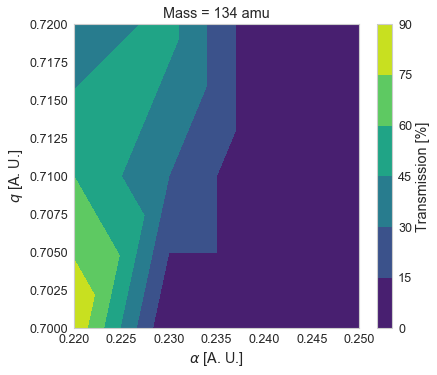

In [106]:
plot_transmission_contours(df134)

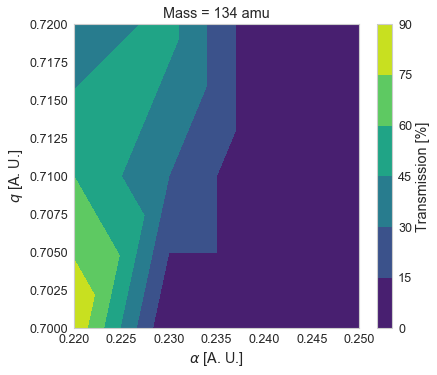

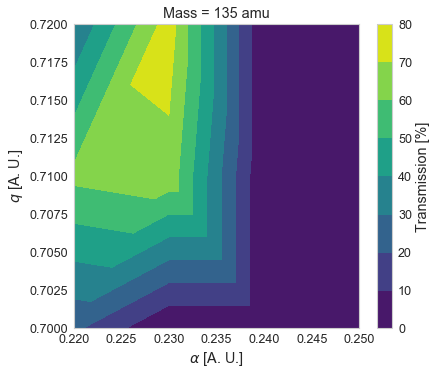

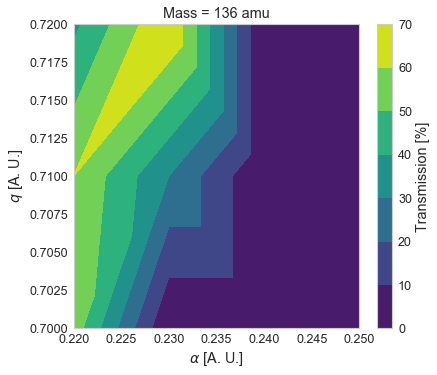

In [129]:
masses = df.mass[~df.mass.duplicated()].values

for m in masses:
    dfm = df.where(df.mass == m).dropna()
    plot_transmission_contours(dfm, m)